In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_data = pd.read_csv('./kaggle_data/data.csv', delimiter=',')
df_data_w_generes = pd.read_csv('./kaggle_data/data_w_genres.csv', delimiter=',')
df_data_by_artist = pd.read_csv('./kaggle_data/data_by_artist.csv', delimiter=',')
df_data_by_genres = pd.read_csv('./kaggle_data/data_by_genres.csv', delimiter=',')
df_data_by_year = pd.read_csv('./kaggle_data/data_by_year.csv', delimiter=',')


In [2]:
df_data.loc[df_data['artists'] == '[\'Metallica\']']

df_new = df_data.copy()

df_new = df_new.drop(columns=['id', 'acousticness', 'explicit', 'energy', 'release_date', 'mode', 'key'])
df_new.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,['Carl Woitschach'],0.708,158648,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,['Seweryn Goszczyński'],0.749,104300,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,['Francisco Canaro'],0.781,180760,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


In [3]:
#df_new.corr()

In [4]:
df_new.drop(df_new[df_new.duration_ms < 60000].index, inplace=True)
print(df_data.shape[0])
print(df_new.shape[0])

169909
168313


In [5]:
df_new.drop(df_new[df_new.popularity == 0].index, inplace=True)
print(df_data.shape[0])
print(df_new.shape[0])

169909
141730


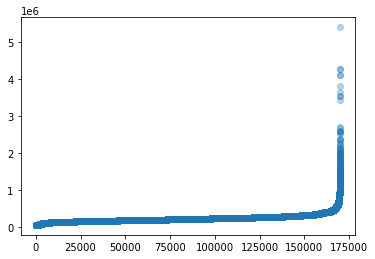

In [6]:
x = df_new.index
y = df_new.sort_values(by='duration_ms')['duration_ms']
plt.scatter(x, y, alpha=0.3, cmap='viridis')

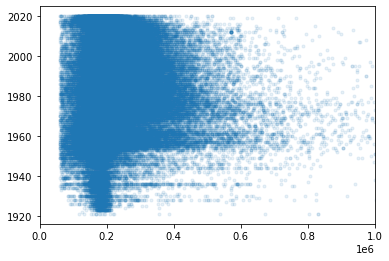

In [7]:
x = df_new['duration_ms']
y = df_new.year
plt.xlim(0, 1000000)
plt.scatter(x, y, marker='.', alpha=0.1, cmap='viridis')

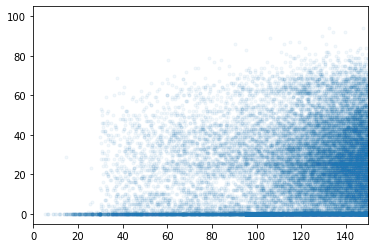

In [19]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.popularity
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

In [ ]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(0, 150)
plt.pie(x)

([<matplotlib.patches.Wedge at 0x21b05bf3d30>,
  ...],
 [Text(1.0999999999116212, 1.3943949821106325e-05, ''),
  Text(1.0999999987383025, 5.268524096018857e-05, ''),
  Text(1.0999999965871907, 8.664975750631029e-05, ''),
  Text(1.099999994328244, 0.00011170435860006948, ''),
  Text(1.099999983928004, 0.00018803827077583789, ''),
  Text(1.0999999644969918, 0.00027947561113152565, ''),
  Text(1.0999999527317788, 0.00032247493682808847, ''),
  Text(1.099999944947685, 0.00034801593388357986, ''),
  Text(1.0999999357961545, 0.00037583035524538705, ''),
  Text(1.099999927301435, 0.00039992103979242594, ''),
  Text(1.099999903142852, 0.0004616120840195442, ''),
  Text(1.0999998766286707, 0.0005209768798021548, ''),
  Text(1.0999998583712989, 0.0005581963120185314, ''),
  Text(1.0999998349201847, 0.0006026404953930858, ''),
  Text(1.0999998128536825, 0.000641655564428099, ''),
  Text(1.0999997884501542, 0.0006822093638835682, ''),
  Text(1.0999997596840483, 0.000727114183704444, ''),
  Text(1.